In [26]:
# import module for data
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import scipy.stats as stats
import seaborn as sns
import scipy.stats as sp

%matplotlib inline


In [27]:
# read data, change direcoty in cmd or python first always
dt=pd.read_csv("titanic-data.csv")  
dt.head() # preview the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S


# 1.1 Assumptions.

Based on the summary statistics so far,  we have following assumptions on who might survive.By comparing the summary statistics of survived or not, there seems to have bigger difference in following variables:fare, Pclass, Parch and Sex. We would do more analysis to validate our assumptions below.

1. Women were more likely to survive.
2. Children were more likely to survive.
3. Give all other circumstance, those who were younger are more likely to survive
4. Wealthier people were more likely to survived, which could be inferre from Pclass and fare
5. Those who had children were more likely to survived.
6. Those variables seems unrelated to survival: passengerId, tickets.

# 1.3 Missing values

As we can see from below output, the data is very clean. There are two variables that have missing value: Ages and Cabin. In the following analysis, we would simply ignore the missing values. 



In [28]:
# check variables types, should not use bracket 
dt.info()
print("_"*40)
dt.isnull().sum() #check missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 1.3 Summary statistics
The below table shows the general descriptive statistics, which gives us an overview of what is going on in the data.

- Header. This tells us the exact data in the datasets.
- Descriptive statistics. We show the descriptive statistcs in two parts: numeric and categorical. It gives us an overview of data structure, data central tendancy, variation etc.
- Statistics by survival rate.  The outputs give us an ituitive comparison of the difference between poeple who survied and those not.

In [29]:
dt.describe() #summary statistics

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000,891.000,891.000,714.000,891.000,891.000,891.000
mean,446.000,0.384,2.309,29.699,0.523,0.382,32.204
std,257.354,0.487,0.836,14.526,1.103,0.806,49.693
min,1.000,0.000,1.000,0.420,0.000,0.000,0.000
25%,223.500,0.000,2.000,20.125,0.000,0.000,7.910
50%,446.000,0.000,3.000,28.000,0.000,0.000,14.454
75%,668.500,1.000,3.000,38.000,1.000,0.000,31.000
max,891.000,1.000,3.000,80.000,8.000,6.000,512.329


In [30]:
dt.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [31]:
#check the summary statistics by 'Survived'
dtbysur=dt.groupby('Survived')
dtbysur.describe()

Age     Fare    Parch  PassengerId   Pclass    SibSp
Survived                                                                
0        count  424.000  549.000  549.000      549.000  549.000  549.000
         mean    30.626   22.118    0.330      447.016    2.532    0.554
         std     14.172   31.388    0.823      260.640    0.736    1.288
         min      1.000    0.000    0.000        1.000    1.000    0.000
         25%     21.000    7.854    0.000      211.000    2.000    0.000
         50%     28.000   10.500    0.000      455.000    3.000    0.000
         75%     39.000   26.000    0.000      675.000    3.000    1.000
         max     74.000  263.000    6.000      891.000    3.000    8.000
1        count  290.000  342.000  342.000      342.000  342.000  342.000
         mean    28.344   48.395    0.465      444.368    1.950    0.474
         std     14.951   66.597    0.772      252.359    0.863    0.709
         min      0.420    0.000    0.000        2.000    1.000    0.000
         25%     19.000   12.475    0.000      250.750    1.000    0.000
         50%     28.000   26.000    0.000      439.500    2.000    0.000
         75%     36.000   57.000    1.000      651.500    3.000    1.000
         max     80.000  512.329    5.000      890.000    3.000    4.000

In [32]:
dtbysur.describe(include=['O']) 

Cabin Embarked                       Name     Sex    Ticket
Survived                                                                      
0        count        68      549                        549     549       549
         unique       62        3                        549       2       470
         top        C124        S  Graham, Mr. George Edward    male  CA. 2343
         freq          2      427                          1     468         7
1        count       136      340                        342     342       342
         unique      101        3                        342       2       260
         top     B96 B98        S      Saalfeld, Mr. Adolphe  female      1601
         freq          4      217                          1     233         5


# 2. 1 T-tests

We will run t-tests below see whether there is significant difference between the people who survived and thost not.
Here we use the two sample test because we are testing two samples from independent groups


## T test results summary
 - For those who survived, their fare is different from those not, which is consiste wit the passenger class.The survivors seemed to have more expensive fare and high passenger class( smaller in terms of number)
 -  One thing to be careful about the t test is the multiple comparisons problem since we are comparing the attributes multiple times. We might try the 'Bonferroni Method' for the accuracy. But since this is not the purpose of this analysis, the simple t test would do the job fine.


## Hypothesis 1

- The null hypothesis: the mean of fare for those who survived is same as those who did not.
- The alternative hypothesis: the mean of fare for those who survived is different from those not.
- The sinificanct level is at 0.05
- The result: we reject the null hypothesis.
- For those who survived have a different mean of fare than those not.


In [33]:
# t test between survived or not in terms of fare
stats.ttest_ind(a= dt[dt.Survived==1].Fare,  #similar: dt.loc[dt.Survived==1,'Fare']
                b= dt[dt.Survived==0].Fare,
                equal_var=True)         

Ttest_indResult(statistic=7.9391916608710549, pvalue=6.1201893419241981e-15)

## Hypothesis 2

- The null hypothesis: the mean of SibSp number for those who survived is same as those who did not.
- The alternative hypothesis: the mean of SibSp for those who survived is different from those not.
- The sinificanct level is at 0.05
- The result: we fail to reject the null hypothesis.



In [34]:
# t test between survived or not in terms of Sibsp
stats.ttest_ind(a= dt[dt.Survived==1].SibSp, 
                b= dt[dt.Survived==0].SibSp,
                equal_var=True) 

Ttest_indResult(statistic=-1.0538368963521951, pvalue=0.29224392869829369)

## Hypothesis 3

- The null hypothesis: the mean of Parch number for those who survived is same as those who did not.
- The alternative hypothesis: the mean of Parch for those who survived is different from those not.
- The sinificanct level is at 0.05
- The result: we reject the null hypothesis.
- For those who survived have a different mean of Parch than those not.


In [35]:
# t test between survived or not in terms of Parch
stats.ttest_ind(a= dt[dt.Survived==1].Parch,  
                b= dt[dt.Survived==0].Parch,
                equal_var=True) 

Ttest_indResult(statistic=2.4420204414794604, pvalue=0.014799245374728058)

## Hypothesis 4

- The null hypothesis: the mean of Age for those who survived is same as those who did not.
- The alternative hypothesis: the mean of Age for those who survived is different from those not.
- The sinificanct level is at 0.05
- The result: we reject the null hypothesis.
- For those who survived have a different mean of Age than those not.


In [36]:
#Age
stats.ttest_ind(a= dt[dt.Survived==1].Age.dropna(),  
                b= dt[dt.Survived==0].Age.dropna(),
                equal_var=True)

Ttest_indResult(statistic=-2.0666869462538102, pvalue=0.039124654013482488)

# 2.2 Chi-squred test

Since sex and Pclass are categorical variables, we will test them using Chi-squre test. They met the following assumptions: 
- Each cell has at least 5 expected cases. 
- Each case only contributes to once cell in the table. 
- If sample, random sample and less than 10% population. This dataset is already a population.

In [37]:
def compute_freq_chi2(x,y):
    """This function will compute frequency table of x an y
    Pandas Series, and use the table to feed for the contigency table
    
    Parameters:
    -------
    x,y : Pandas Series, must be same shape for frequency table
    
    Return:
    -------
    None. But prints out frequency table, chi2 test statistic, and 
    p-value
    """
    freqtab = pd.crosstab(x,y)
    print("Frequency table")
    print("============================")
    print(freqtab)
    print("============================")
    chi2,pval,dof,expected = sp.chi2_contingency(freqtab)
    print("ChiSquare test statistic: ",chi2)
    print("p-value: ",pval)
    return

The following test showed there is significant difference beween male and female in terms of survival rates. The p value is less than 0.05, critical value.

In [38]:
dt['Survived'].replace({0:'Perished', 1:'Survived'})
dt  #why the survived column not replaced? the data keeps the same even if I run the .raplace

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.458,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.862,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.133,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.071,NaN,C


In [39]:
compute_freq_chi2(dt.Survived,dt.Sex)


Frequency table
Sex       female  male
Survived              
0             81   468
1            233   109
('ChiSquare test statistic: ', 260.71702016732104)
('p-value: ', 1.1973570627755645e-58)


The following test showed there is significant difference among Pclass in terms of survival rates. The p value is less than 0.05, critical value.

In [40]:
compute_freq_chi2(dt.Survived,dt.Pclass)


Frequency table
Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
('ChiSquare test statistic: ', 102.88898875696056)
('p-value: ', 4.5492517112987927e-23)


# 2.3 Correlations

We will plot the correlation chart to the the relationship between each two variables. Since gender is importnat but it is not numerical. We will first create a new 'sex2', numerical variable.

In [41]:
#create new column for 'sex' where it is numerical
rlength=len(dt['Sex']) 
dt['sex2']=pd.Series(np.random.randn(rlength),index=dt.index)
dt.loc[dt.Sex=='male','sex2']=0    # similar:dt[dt.Sex=='male'].sex2
dt.loc[dt.Sex=='female','sex2']=1  # dt['Sex2'] = dt['Sex'].replace({'male':0, 'female':1})


In [42]:
dt.corr()  # check the correlation of variables

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,sex2
PassengerId,1.000,-0.005,-0.035,0.037,-0.058,-0.002,0.013,-0.043
Survived,-0.005,1.000,-0.338,-0.077,-0.035,0.082,0.257,0.543
Pclass,-0.035,-0.338,1.000,-0.369,0.083,0.018,-0.549,-0.132
Age,0.037,-0.077,-0.369,1.000,-0.308,-0.189,0.096,-0.093
SibSp,-0.058,-0.035,0.083,-0.308,1.000,0.415,0.160,0.115
Parch,-0.002,0.082,0.018,-0.189,0.415,1.000,0.216,0.245
Fare,0.013,0.257,-0.549,0.096,0.160,0.216,1.000,0.182
sex2,-0.043,0.543,-0.132,-0.093,0.115,0.245,0.182,1.000


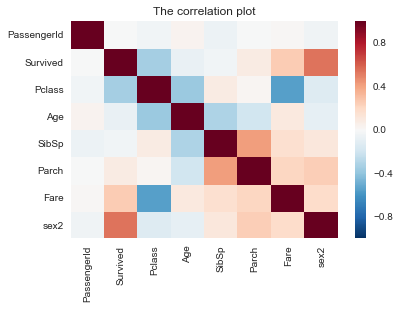

In [43]:
corr = dt.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)   # Similar:plt.matshow(dt.corr())

plt.title('The correlation plot')

As we can see from above correlation output, the following factors affect the survival rate most:passenger class,fare and gender.

If the passenger is female, in better passenger class(lower the class number), has high fares, she is more likely to survive. The correlation figure support our t tests results to. The Parch also plays a role in determing the survival rate.

# 3 Statistical summaries and visualisations

## 3.1 Pivotal Charts
We will group them by features to see which sub-group has the highest survival rate and investigate whether the sub-group exhibites systematic change.
- **Sex** Female had very high survival rate
- **Pclass** For Pclass=1, they had very high survial rate
- **Parch** For certain Parch=1,2,3, they had high survival rate
- **SibSp** It has very different results but general, the survial rates were not as consistent as others.

In [44]:
dt[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742
1,male,0.189


In [45]:
dt[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.630
1,2,0.473
2,3,0.242


In [46]:
dt[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.344
1,1,0.551
2,2,0.500
3,3,0.600
4,4,0.000
5,5,0.200
6,6,0.000


In [47]:
dt[['SibSp', 'Survived']].groupby(['SibSp'],as_index=False).mean()

,SibSp,Survived
0,0,0.345
1,1,0.536
2,2,0.464
3,3,0.250
4,4,0.167
5,5,0.000
6,8,0.000


## 3.2 Visualizations

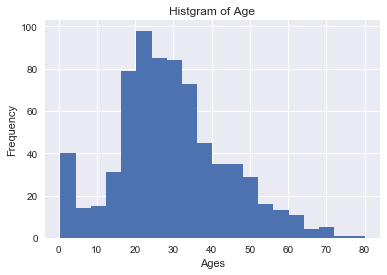

In [48]:
plt.hist(dt.Age.dropna(),bins=20)  # remember to remove nulls
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.title('Histgram of Age')

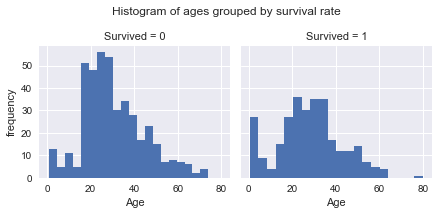

In [49]:
g = sns.FacetGrid(dt, col='Survived')
g.map(plt.hist, 'Age', bins=20)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Histogram of ages grouped by survival rate')
g.set_ylabels('frequency')

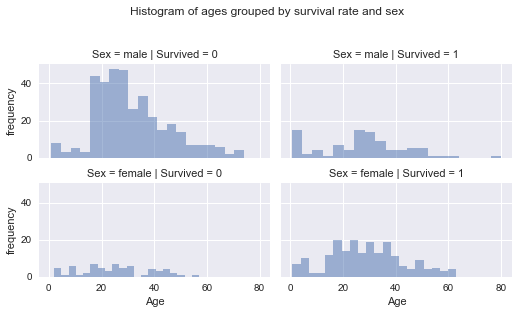

In [54]:
grid = sns.FacetGrid(dt, col='Survived', row='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();
plt.subplots_adjust(top=0.8)
grid.fig.suptitle('Histogram of ages grouped by survival rate and sex')
grid.set_ylabels('frequency')

- Survivors were mostly aged between 20 and 40 and children.
- The distribution of survivors and victims are different too.
- The victims were mostly aged between 20 and 30, probably most passengers were between 20 and 35.

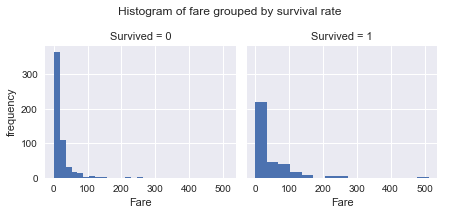

In [55]:
g = sns.FacetGrid(dt, col='Survived')
g.map(plt.hist,'Fare',bins=15)
g.add_legend();
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Histogram of fare grouped by survival rate')
g.set_ylabels('frequency')

- The histgram shows, there are significantly difference between survival rates in terms of the fare, which, again, shows proof for above T test.
- For those who survived generally paid more than those didn'. Very few expensive fare holder died.

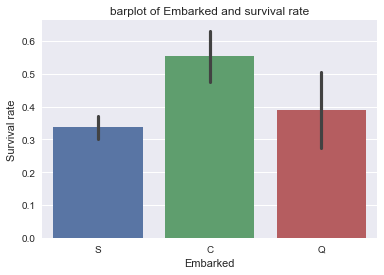

In [52]:
g=sns.barplot(x='Embarked',y='Survived',data=dt)
g.set(xlabel='Embarked', ylabel='Survival rate',title="barplot of Embarked and survival rate")


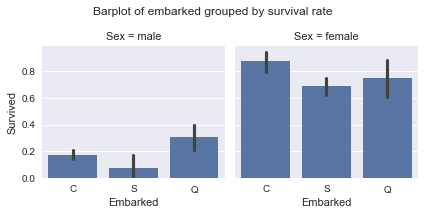

In [53]:
g = sns.FacetGrid(dt, col='Sex')
g.map(sns.barplot,'Embarked','Survived')
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Barplot of embarked grouped by survival rate')

- As you can see from above bar plots, people embarked on C were most likely to survive while the survival rates of S and Q were almost the same.  
- When we include the sex variable, again, females were more likely to survive. As for male, people embarked on Q had higher survival rate.

# 4 Conclusions

For the record, the below factors are based on exploratory analysis without formal modelling. After controlling counfounding factors, we will get more accurate results.

## Facotrs favorable to survival rate

- Sex. The female passengers generally had higher survival rate. This is probably due to the fact that women and children were allow to board the lifeboat earlier
- Age. Children had higher survival rate.
- Fare. If you had a more expensive fare ticket, you were more likely to survive. In other words, rich people had higher survival rate.
- Pclass. If you had a better class, you were more likely to survive
- Parch. If you had more parents/children on board, you were more likely to survive. Since children were allowed to board lifeboat ealier, their parents or especially the mothers were more likely to be allowed to board too.
- Embarked. If you were embarked on S, in general, it is more likely to survive

## Facotrs unfavorable to survival rate

- Sex. Male were less likely to survive.
- Age. Adults had lower survival rate than children.
- Fare. If you had cheap tickets, it is more likely that you would die.
- Pclass. Cheaper class means less survival rate.
- Parch. If you are single on board, you were more likely to die.

To sum up,  children and women were more likely to survive. Rich people had edge than poor people over the survival rates. If you were with children, you were also more likely to survive.

## Limitations

We have some limitations regarding our above analysis.

- First, the analysis are very preliminary. The tools we used are basic descriptive analysis and t test, which are meant for first stage data explore. To establish stronger relationship between survival and factors that contribute to it, we need more advanced tool, such as classificatoins etc.

- Second, we have missing values on Age and cabins. If we could have a more complete information, which might provive more insights on how ages or cabins affect the survival rate.

## Future directions

As I have mentioned earlier, we could adopt more advanced methods to investigate what facotrs might contribute to higher survival rate, such as decision trees, support vector machines etc.

We can also create new variables based the current information, such as whether titles have an impact. Mayber Dr. have a higher rate of survival due to respect and high social class.

## Reference


- [A journey through Titanic](https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic)
- [Getting Started with Pandas: Kaggle's Titanic Competition](https://www.kaggle.com/c/titanic/details/getting-started-with-random-forests)
- [Titanic Best Working Classifier](https://www.kaggle.com/sinakhorami/titanic/titanic-best-working-classifier)
- [Titanic Data Science Solutions](https://www.kaggle.com/datamle/titanic/titanic-data-science-solutions-8bd21c/editnb)
- [Titanic data](https://napitupulu-jon.appspot.com/posts/titanic.html)